## Reading the file and encoding of dependent variable column

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("wine quality - red.csv")

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# pre-processing/data cleaning

print(df.shape)

df.dropna(inplace = True)

print(df.shape)

(1599, 12)
(1599, 12)


In [98]:
# 3, 4, 5, 6, 7, 8

#col_quality = df[["quality"]].values

#print(np.unique(col_quality))
#print(len(np.unique(col_quality)))

In [99]:
# naive encoding

#quality_list = [3, 4, 5, 6, 7, 8]

#quality_dict = {}

#for i in range(len(quality_list)):
 #   quality_dict[quality_list[i]] = i

#df["quality"] = df.quality.map(quality_dict)

#df[["quality"]].head()

In [100]:
# test if encoding has been done correctly

#df.dropna(inplace = True)

#df

## Training of DT model

In [101]:
# splitting the data in training and test datasets

from sklearn.model_selection import train_test_split

y = df["quality"]
x = df.iloc[:, 0: -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
1232,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
39,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5


In [102]:
y_train.head()

140     5
1232    5
720     5
77      6
39      5
Name: quality, dtype: int64

In [103]:
# train the model
import time
from sklearn.tree import DecisionTreeClassifier



dt = DecisionTreeClassifier(random_state = 0)
training_start_time = time.time()
dt.fit(x_train, y_train)
training_time_taken = time.time() - training_start_time
print("Duration of training")
print("--- %s seconds ---" % (training_time_taken))

Duration of training
--- 0.009016036987304688 seconds ---


## Validation and prediction of DT model

In [104]:
# validate the model using the test dataset

predict_start_time = time.time()
y_pred = dt.predict(x_test)
predict_time_taken = time.time() - predict_start_time

print("Duration of prediction")
print("--- %s seconds ---" % (predict_time_taken))
print()
print(y_test)
print()
print(y_pred)

Duration of prediction
--- 0.0019948482513427734 seconds ---

1109    6
1032    5
1002    7
487     6
979     5
       ..
489     6
362     5
526     5
442     7
1229    5
Name: quality, Length: 400, dtype: int64

[6 4 7 5 5 6 6 6 5 5 4 5 6 4 6 5 7 5 5 4 6 6 6 7 5 5 5 7 5 8 7 7 4 6 7 7 5
 6 6 4 5 5 4 7 6 5 5 6 5 8 5 6 6 6 6 5 5 5 7 5 5 5 6 7 5 6 5 5 6 6 5 7 5 5
 6 6 5 5 5 7 6 6 6 6 6 5 4 5 5 5 5 6 6 5 7 5 6 4 5 7 7 6 5 6 5 5 5 5 6 5 6
 5 8 5 6 6 6 6 6 6 5 7 5 5 5 7 5 6 7 7 6 5 6 6 6 5 6 5 6 5 6 5 5 6 5 6 8 6
 5 5 6 7 5 6 6 6 5 6 6 6 5 7 7 6 5 5 6 6 6 6 5 5 4 7 5 6 5 7 7 5 5 7 6 6 6
 6 5 5 5 7 6 5 6 6 5 5 4 6 5 5 5 6 6 6 6 5 5 6 7 6 6 8 5 6 5 6 7 5 6 6 5 6
 7 6 6 6 5 6 6 5 5 6 6 6 7 6 5 7 7 6 5 6 6 5 7 5 6 5 5 6 5 5 6 5 5 5 5 5 5
 7 7 6 5 6 5 5 5 5 5 7 5 5 6 5 5 6 5 6 6 6 5 7 5 6 6 5 5 5 7 6 5 5 6 6 7 6
 5 5 5 5 6 5 6 6 6 6 6 5 6 5 5 6 5 4 7 6 7 5 5 7 5 5 6 8 6 4 7 6 5 6 7 5 5
 7 4 7 7 5 6 6 5 5 5 6 6 6 6 6 5 6 6 6 7 6 7 3 6 5 6 7 5 6 5 6 6 5 6 7 5 4
 6 5 5 6 5 5 7 6 6 7 6 6 6 5 5 6 7 5

In [105]:
# predict 8.0, 0.695, 0.58, 2.1, 0.191, 21.0, 45.0, 0.875, 4.32, 1.12, 11.0

print(dt.predict([[8.0, 0.695, 0.58, 2.1, 0.191, 21.0, 45.0, 0.875, 4.32, 1.12, 11.0]]))

[8]


In [106]:
# get the accuracy score of the dt model

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.6325


In [107]:
# confusion matrix of the model

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   2,   7,   3,   2,   0],
       [  1,  10, 115,  30,  12,   1],
       [  0,   3,  37, 111,  17,   2],
       [  0,   1,   3,  10,  24,   2],
       [  0,   0,   0,   2,   2,   1]], dtype=int64)

## Visualising the DT model

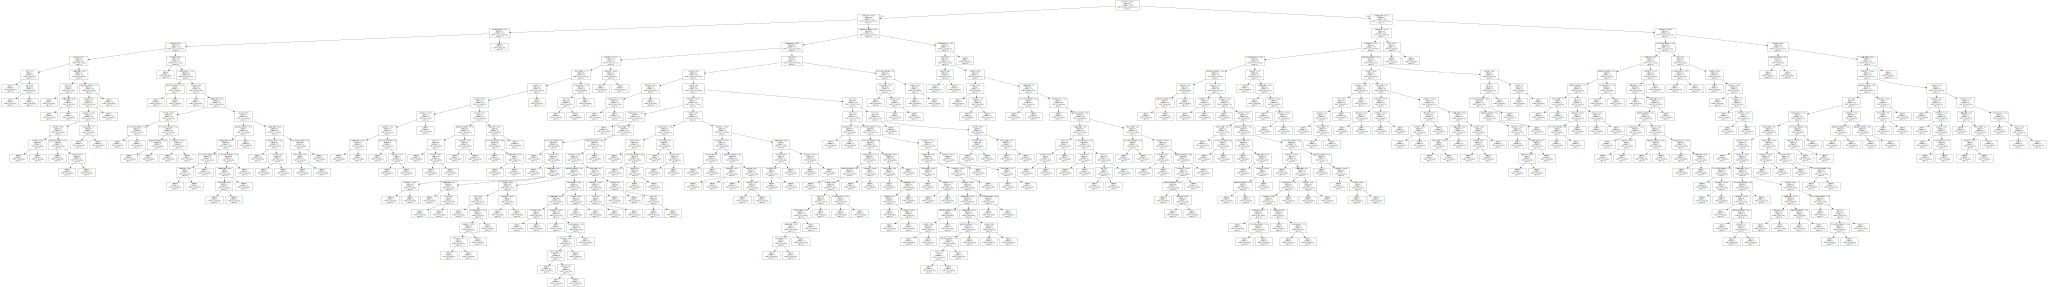

In [108]:
from sklearn import tree
import graphviz
from graphviz import Source

# display the tree, with no output file

Source(tree.export_graphviz(dt, out_file=None, class_names=["3", "4", "5", "6", "7", "8"], 
                            feature_names= x_train.columns))

## Feature Engineering of the previous DT model

In [19]:
# feature engineering can delete habitat and cap-shape from x_train

del x_train["habitat"]
del x_train["cap-shape"]
x_train.head()

,cap-surface,cap-color,bruises,odor,population
253,2,8,1,0,2
667,3,2,0,2,4
85,0,3,0,5,0
969,3,2,0,2,4
75,2,4,1,6,3


In [20]:
# train the model again using new x_train

training_start_time = time.time()
dt.fit(x_train, y_train)
training_time_taken = time.time() - training_start_time
print("Duration of training")
print("--- %s seconds ---" % (training_time_taken))

Duration of training
--- 0.0019943714141845703 seconds ---


## Validation and prediction of new DT model

In [21]:
# validate the model using the test dataset

del x_test["habitat"]
del x_test["cap-shape"]

predict_start_time = time.time()
y_pred = dt.predict(x_test)
predict_time_taken = time.time() - predict_start_time

print("Duration of prediction")
print("--- %s seconds ---" % (predict_time_taken))
print()
print(y_test)
print()
print(y_pred)

Duration of prediction
--- 0.0010406970977783203 seconds ---

993    1
859    0
298    1
553    1
672    1
      ..
462    0
356    0
2      1
478    0
695    0
Name: class, Length: 250, dtype: int64

[1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0]


In [22]:
# predict the class when cap-surface = 1, cap-color = 5, bruises = 1,
# odor = 6, population = 3

print(dt.predict([[1, 5, 1, 6, 3]]))

[0]


In [23]:
# get the accuracy score of the new dt model

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.996

In [24]:
# confusion matrix of the model

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[120,   0],
       [  1, 129]], dtype=int64)

## Visualising the new DT model

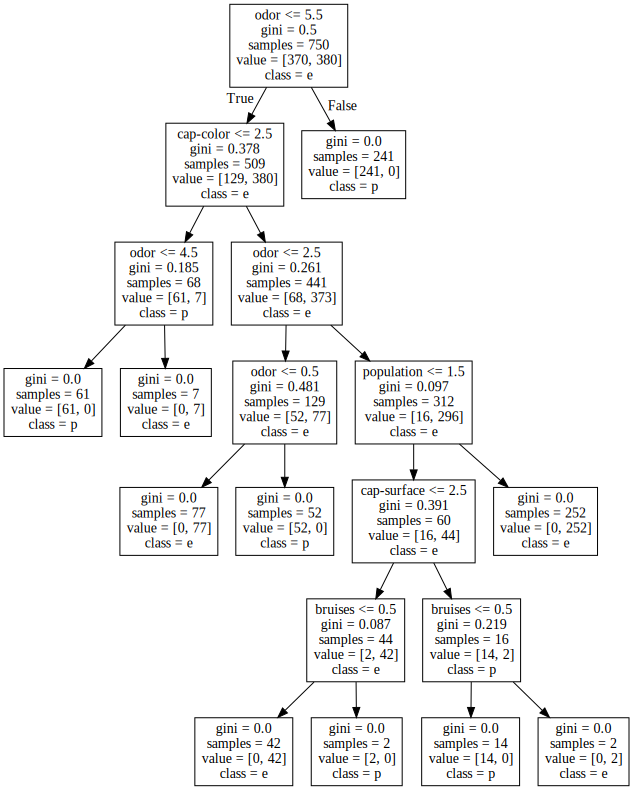

In [25]:
from sklearn import tree
import graphviz
from graphviz import Source

# display the tree, with no output file

Source(tree.export_graphviz(dt, out_file=None, class_names=["p", "e"], 
                            feature_names= x_train.columns))